## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
import os 
from sklearn.model_selection import train_test_split 

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

from sklearn.metrics import accuracy_score



In [2]:
data = []
labels = []
classes = 43 
cur_path = os.getcwd() 

In [3]:
cur_path

'd:\\Artificial_Intelligence\\AI\\ARTIFICIAL_INTELLIGENCE\\Deep_Learning\\Traffic_Signal_Prediction'

In [4]:
for i in range(classes): 
  path = os. path.join(cur_path,'Data\\train', str(i)) 
  # print(path)
  images = os.listdir(path) 
#   print(images)
  for a in images: 
    # print(a)
    try: 
      image = Image.open(path+"/"+a) 
      # print(image)
      image = image.resize((30,30)) 
      image = np.array(image) 
      data.append(image) 
      labels.append(i) 
    except: 
      print("Error loading image")
data=np.array(data)
labels=np.array(labels)
  

In [5]:
type(data)

numpy.ndarray

In [6]:
type(labels)

numpy.ndarray

In [7]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


## Splitting training and testing dataset

In [8]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,random_state=0,test_size=0.2)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [10]:
print(y_train)

[ 5  4 35 ... 26 13  2]


## Converting the labels into one hot encoding

In [11]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## CNN model building

In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

## Compilation of the model

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model training and validation

In [14]:
Epoch=15
anc = model.fit(X_train, y_train, batch_size=32, epochs=Epoch, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 67s 68ms/step - loss: 1.8963 - accuracy: 0.5274 - val_loss: 0.5801 - val_accuracy: 0.8572
Epoch 2/15
981/981 [==============================] - 64s 66ms/step - loss: 0.8310 - accuracy: 0.7573 - val_loss: 0.3092 - val_accuracy: 0.9217
Epoch 3/15
981/981 [==============================] - 68s 69ms/step - loss: 0.6114 - accuracy: 0.8144 - val_loss: 0.2243 - val_accuracy: 0.9331
Epoch 4/15
981/981 [==============================] - 72s 74ms/step - loss: 0.4600 - accuracy: 0.8617 - val_loss: 0.1517 - val_accuracy: 0.9593
Epoch 5/15
981/981 [==============================] - 64s 66ms/step - loss: 0.3785 - accuracy: 0.8879 - val_loss: 0.1197 - val_accuracy: 0.9658
Epoch 6/15
981/981 [==============================] - 65s 66ms/step - loss: 0.3278 - accuracy: 0.9013 - val_loss: 0.1433 - val_accuracy: 0.9551
Epoch 7/15
981/981 [==============================] - 64s 66ms/step - loss: 0.3025 - accuracy: 0.9125 - val_loss: 0.1544 - val_accuracy:

In [15]:
? anc

Type:        History
String form: <keras.callbacks.History object at 0x00000280B5459B20>
File:        c:\users\thoma\anaconda3\lib\site-packages\keras\callbacks.py
Docstring:  
Callback that records events into a `History` object.

This callback is automatically applied to
every Keras model. The `History` object
gets returned by the `fit` method of models.

Example:

>>> model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
>>> model.compile(tf.keras.optimizers.SGD(), loss='mse')
>>> history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
...                     epochs=10, verbose=1)
>>> print(history.params)
{'verbose': 1, 'epochs': 10, 'steps': 1}
>>> # check the keys of history object
>>> print(history.history.keys())
dict_keys(['loss'])


In [16]:
print(anc.params)

{'verbose': 1, 'epochs': 15, 'steps': 981}


In [17]:
print(anc.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [18]:
print(anc.history['loss'])

[1.8962665796279907, 0.8310374021530151, 0.6114310026168823, 0.45997095108032227, 0.37849161028862, 0.3278405964374542, 0.30250847339630127, 0.3007480502128601, 0.26384881138801575, 0.2726565897464752, 0.24408216774463654, 0.25747451186180115, 0.24470573663711548, 0.24630266427993774, 0.23685266077518463]


## plotting graphs for accuracy

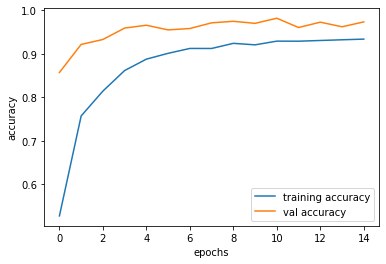

In [19]:
plt.figure(0)

plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend()

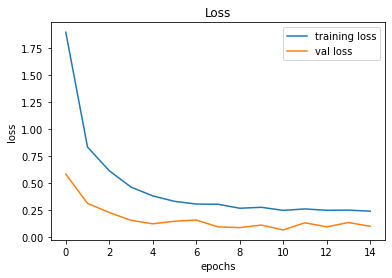

In [20]:
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

## Model testing

In [21]:
test_data = pd.read_csv("D:\Artificial_Intelligence\AI\ARTIFICIAL_INTELLIGENCE\Deep_Learning\Traffic_Signal_Prediction\Data\Test.csv")

In [22]:
test_data.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [23]:
test_data.columns

Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')

In [24]:
test_data["ClassId"].unique()

array([16,  1, 38, 33, 11, 18, 12, 25, 35,  7, 23,  4,  9, 21, 20, 27,  3,
       13, 10,  5, 17, 34,  2,  8, 30, 24, 15, 26, 28, 22, 14, 32, 29,  6,
       36, 40, 41, 31, 19,  0, 39, 42, 37], dtype=int64)

In [25]:
labels = test_data["ClassId"].values
imgs = test_data["Path"].values
data=[]
for img in imgs:
    image = Image.open("Data"+"/"+img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
# pred = model.predict_classes(X_test)
pred=model.predict(X_test) 
classes_x=np.argmax(pred,axis=1)

395/395 [==============================] - 3s 8ms/step


In [26]:
pred

array([[1.2742899e-29, 2.5334112e-18, 2.1984320e-17, ..., 2.1816784e-20,
        2.9324399e-12, 1.0309353e-16],
       [1.6127297e-11, 9.9999809e-01, 3.9415787e-07, ..., 3.9802585e-13,
        4.2956913e-31, 1.0742695e-17],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.8194175e-06, 7.9282763e-04, 2.2548593e-03, ..., 3.6755491e-06,
        2.9370776e-05, 1.3479297e-03],
       [1.9422564e-09, 7.0338807e-05, 1.8566150e-05, ..., 1.4397027e-07,
        2.2844546e-13, 1.5909391e-07],
       [7.5040343e-17, 1.8911887e-10, 1.3384845e-06, ..., 6.3953121e-07,
        6.5325427e-12, 4.6927229e-07]], dtype=float32)

In [27]:
classes_x

array([16,  1, 38, ..., 15,  7, 10], dtype=int64)

In [28]:
print(accuracy_score(labels, classes_x))

0.9350752177355502


In [29]:
model.save('traffic_classifier.h1')

INFO:tensorflow:Assets written to: traffic_classifier.h1\assets


INFO:tensorflow:Assets written to: traffic_classifier.h1\assets
